In [1]:
import random as rnd


class GeneticAlgorithms:
    def geneticAlgorithm(problem, population, fitnessFunction, mutationProbability=0.1, iterations=100):
        iteration = 0
        while True:

            newPopulation = []
            for i in range(0, len(population)):
                x = GeneticAlgorithms.roulleteSelection(population, fitnessFunction)
                y = GeneticAlgorithms.roulleteSelection(population, fitnessFunction)

                child = problem.reproduce(x, y)

                if rnd.random() < mutationProbability:
                    child = GeneticAlgorithms.mutate(child)

                # newPopulationLength = len(newPopulation)
                newPopulation.append(child)
                # newPopulation = np.reshape(newPopulation, (newPopulationLength+1, len(child)))

            population = newPopulation

            # print([fitnessFunction(element) for element in population])  # * uncommenting this line will show how the population evolves as soon as it finds a better child (specially with nqueens)

            if iteration > iterations:
                break

            iteration += 1

        bestChild = GeneticAlgorithms.bestSelection(population, fitnessFunction)
        problem.printState(bestChild, 'Genetic Algorithm')
        # return bestChild

    def roulleteSelection(population: list, fitnessFunction):
        rnd.shuffle(population)  # Shuffle population

        chance = rnd.random() * sum([fitnessFunction(element) for element in population])  # Total of fitness function values
        for element in population:
            chance -= fitnessFunction(element)
            if chance <= 0:
                return element

    def mutate(child):
        mutatedChild = child.copy()
        childLength = len(child)

        i = rnd.randint(0, childLength - 1)
        j = rnd.randint(0, childLength - 1)
        while i == j:
            j = rnd.randint(0, childLength - 1)

        mutatedChild[i], mutatedChild[j] = mutatedChild[j], mutatedChild[i]  # Swap two random elements

        return mutatedChild

    def bestSelection(population: list, fitnessFunction):
        rnd.shuffle(population)  # Shuffle population
        return max(population, key=fitnessFunction)


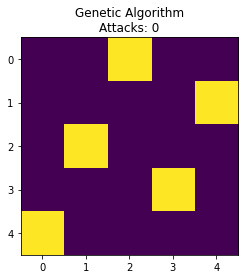

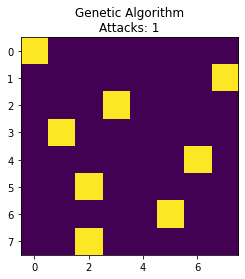

In [2]:
from NQueens import NQueens
nq = NQueens(5)
GeneticAlgorithms.geneticAlgorithm(nq, nq.population(), nq.fitnessFunction)

nq = NQueens(8)
GeneticAlgorithms.geneticAlgorithm(nq, nq.population(), nq.fitnessFunction)


[(87, 11), (90, 56), (1, 56), (48, 17), (100, 40)]


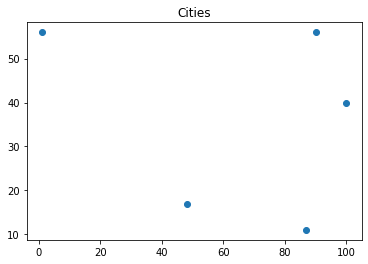

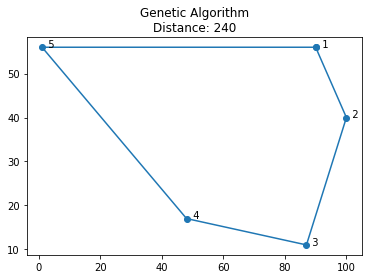

[(71, 28), (40, 14), (42, 53), (48, 9), (4, 62), (99, 24), (12, 52), (59, 83), (45, 47), (36, 25)]


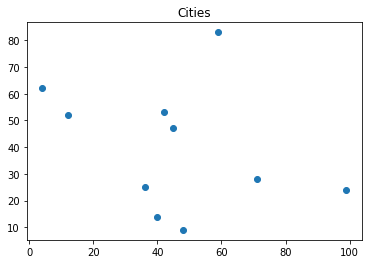

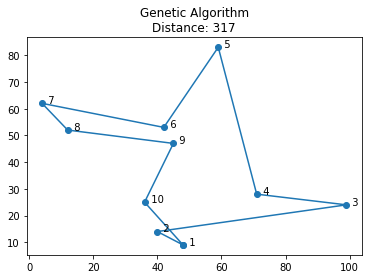

In [3]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(5)
GeneticAlgorithms.geneticAlgorithm(ts, ts.population(), ts.fitnessFunction)

ts = TravellingSalesman(10)
GeneticAlgorithms.geneticAlgorithm(ts, ts.population(), ts.fitnessFunction)
